In [35]:
import torch
from torch import nn
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/home/amitaharoni/workspace/cv-sprint/models/utils.py'>

In [38]:
torch.manual_seed(407)

In [39]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders()
len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset)

(90000, 10000, 10000)

In [27]:
def train(model, name, weight_decay=0):
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), weight_decay=weight_decay)
    hist = utils.train_model(model, train_dl, valid_dl, loss_fn, optimizer, epochs=1000, patience=4, tensorboard_dir=f'../runs/02-{name}', metrics=[utils.metric_accuracy])
    print(utils.evaluate_model(model, test_dl, loss_fn, metrics=[utils.metric_accuracy]))
    utils.plot_metrics(hist)

In [16]:
class VGGNet1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 1024),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 1024),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 200),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

model1 = VGGNet1().to(utils.device)

In [17]:
train(model1, 'vgg-01')

100%|██████████| 157/157 [00:04<00:00, 33.13it/s]


Epoch 1/1000: train_loss=5.2996, train_accuracy=0.0045, val_loss=5.2986, val_accuracy=0.0050
Saving params from epoch 1. Best loss: 5.2986


100%|██████████| 157/157 [00:04<00:00, 33.34it/s]


Epoch 2/1000: train_loss=5.2992, train_accuracy=0.0045, val_loss=5.2986, val_accuracy=0.0050
Saving params from epoch 2. Best loss: 5.2986


100%|██████████| 157/157 [00:04<00:00, 33.67it/s]


Epoch 3/1000: train_loss=5.2993, train_accuracy=0.0042, val_loss=5.2983, val_accuracy=0.0050
Saving params from epoch 3. Best loss: 5.2983


100%|██████████| 157/157 [00:04<00:00, 32.94it/s]


Epoch 4/1000: train_loss=5.2991, train_accuracy=0.0043, val_loss=5.2983, val_accuracy=0.0050
Saving params from epoch 4. Best loss: 5.2983


100%|██████████| 157/157 [00:04<00:00, 33.03it/s]


Epoch 5/1000: train_loss=5.2991, train_accuracy=0.0038, val_loss=5.2983, val_accuracy=0.0050
Saving params from epoch 5. Best loss: 5.2983


100%|██████████| 157/157 [00:04<00:00, 33.00it/s]


Epoch 6/1000: train_loss=5.2991, train_accuracy=0.0043, val_loss=5.2983, val_accuracy=0.0050


100%|██████████| 157/157 [00:04<00:00, 32.05it/s]


Epoch 7/1000: train_loss=5.2991, train_accuracy=0.0042, val_loss=5.2983, val_accuracy=0.0050


 22%|██▏       | 304/1407 [00:21<01:19, 13.87it/s]


KeyboardInterrupt: 

In [33]:
class VGGNet2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 1024),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 1024),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 200),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

model2 = VGGNet2().to(utils.device)

100%|██████████| 157/157 [00:03<00:00, 41.19it/s]


Epoch 1/1000: train_loss=4.8731, train_accuracy=0.0291, val_loss=4.4876, val_accuracy=0.0597
Saving params from epoch 1. Best loss: 4.4876


100%|██████████| 157/157 [00:03<00:00, 43.23it/s]


Epoch 2/1000: train_loss=4.3943, train_accuracy=0.0654, val_loss=4.3834, val_accuracy=0.0737
Saving params from epoch 2. Best loss: 4.3834


100%|██████████| 157/157 [00:03<00:00, 42.63it/s]


Epoch 3/1000: train_loss=4.1117, train_accuracy=0.0988, val_loss=3.8858, val_accuracy=0.1334
Saving params from epoch 3. Best loss: 3.8858


100%|██████████| 157/157 [00:03<00:00, 42.26it/s]


Epoch 4/1000: train_loss=3.8816, train_accuracy=0.1308, val_loss=3.6187, val_accuracy=0.1766
Saving params from epoch 4. Best loss: 3.6187


100%|██████████| 157/157 [00:03<00:00, 43.06it/s]


Epoch 5/1000: train_loss=3.6760, train_accuracy=0.1633, val_loss=3.5052, val_accuracy=0.1938
Saving params from epoch 5. Best loss: 3.5052


100%|██████████| 157/157 [00:03<00:00, 43.36it/s]


Epoch 6/1000: train_loss=3.5005, train_accuracy=0.1912, val_loss=3.3451, val_accuracy=0.2283
Saving params from epoch 6. Best loss: 3.3451


100%|██████████| 157/157 [00:03<00:00, 42.58it/s]


Epoch 7/1000: train_loss=3.3266, train_accuracy=0.2231, val_loss=3.1714, val_accuracy=0.2592
Saving params from epoch 7. Best loss: 3.1714


100%|██████████| 157/157 [00:03<00:00, 42.76it/s]


Epoch 8/1000: train_loss=3.1631, train_accuracy=0.2515, val_loss=3.0850, val_accuracy=0.2725
Saving params from epoch 8. Best loss: 3.0850


100%|██████████| 157/157 [00:03<00:00, 42.81it/s]


Epoch 9/1000: train_loss=3.0214, train_accuracy=0.2795, val_loss=2.9448, val_accuracy=0.3105
Saving params from epoch 9. Best loss: 2.9448


100%|██████████| 157/157 [00:03<00:00, 42.48it/s]


Epoch 10/1000: train_loss=2.8741, train_accuracy=0.3066, val_loss=2.8729, val_accuracy=0.3196
Saving params from epoch 10. Best loss: 2.8729


100%|██████████| 157/157 [00:03<00:00, 42.88it/s]


Epoch 11/1000: train_loss=2.7322, train_accuracy=0.3350, val_loss=2.7320, val_accuracy=0.3412
Saving params from epoch 11. Best loss: 2.7320


100%|██████████| 157/157 [00:03<00:00, 39.55it/s]


Epoch 12/1000: train_loss=2.5983, train_accuracy=0.3603, val_loss=2.6902, val_accuracy=0.3520
Saving params from epoch 12. Best loss: 2.6902


100%|██████████| 157/157 [00:03<00:00, 40.07it/s]


Epoch 13/1000: train_loss=2.4586, train_accuracy=0.3877, val_loss=2.6908, val_accuracy=0.3589


100%|██████████| 157/157 [00:03<00:00, 40.10it/s]


Epoch 14/1000: train_loss=2.3289, train_accuracy=0.4146, val_loss=2.6892, val_accuracy=0.3676
Saving params from epoch 14. Best loss: 2.6892


100%|██████████| 157/157 [00:03<00:00, 40.54it/s]


Epoch 15/1000: train_loss=2.1877, train_accuracy=0.4429, val_loss=2.7177, val_accuracy=0.3667


100%|██████████| 157/157 [00:03<00:00, 40.54it/s]


Epoch 16/1000: train_loss=2.0526, train_accuracy=0.4705, val_loss=2.6026, val_accuracy=0.3858
Saving params from epoch 16. Best loss: 2.6026


100%|██████████| 157/157 [00:03<00:00, 40.16it/s]


Epoch 17/1000: train_loss=1.9103, train_accuracy=0.4995, val_loss=2.6196, val_accuracy=0.3900


100%|██████████| 157/157 [00:03<00:00, 40.77it/s]


Epoch 18/1000: train_loss=1.7734, train_accuracy=0.5310, val_loss=2.7005, val_accuracy=0.3886


100%|██████████| 157/157 [00:03<00:00, 43.21it/s]


Epoch 19/1000: train_loss=1.6351, train_accuracy=0.5564, val_loss=2.6513, val_accuracy=0.3959


100%|██████████| 157/157 [00:03<00:00, 43.26it/s]


Epoch 20/1000: train_loss=1.4978, train_accuracy=0.5867, val_loss=2.7251, val_accuracy=0.3927
Loading model params from epoch 16
{'loss': 2.590837134170532, 'accuracy': 0.3959}


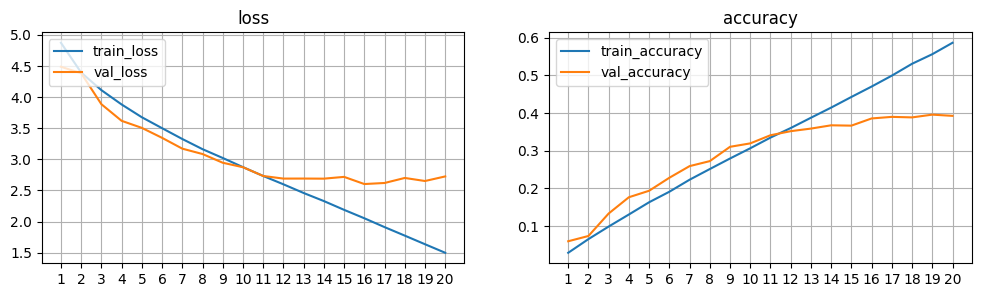

In [34]:
train(model2, 'vgg-02')

In [25]:
class VGGNet3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 1024),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 1024),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(1024, 200),
        )
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

model3 = VGGNet3().to(utils.device)

100%|██████████| 157/157 [00:04<00:00, 32.35it/s]


Epoch 1/1000: train_loss=4.9864, train_accuracy=0.0208, val_loss=4.9681, val_accuracy=0.0314
Saving params from epoch 1. Best loss: 4.9681


100%|██████████| 157/157 [00:04<00:00, 33.12it/s]


Epoch 2/1000: train_loss=4.5807, train_accuracy=0.0463, val_loss=4.5770, val_accuracy=0.0557
Saving params from epoch 2. Best loss: 4.5770


100%|██████████| 157/157 [00:03<00:00, 42.25it/s]


Epoch 3/1000: train_loss=4.3154, train_accuracy=0.0707, val_loss=4.0771, val_accuracy=0.1034
Saving params from epoch 3. Best loss: 4.0771


100%|██████████| 157/157 [00:03<00:00, 42.84it/s]


Epoch 4/1000: train_loss=4.1270, train_accuracy=0.0923, val_loss=3.9108, val_accuracy=0.1279
Saving params from epoch 4. Best loss: 3.9108


100%|██████████| 157/157 [00:03<00:00, 42.91it/s]


Epoch 5/1000: train_loss=3.9354, train_accuracy=0.1186, val_loss=3.7617, val_accuracy=0.1465
Saving params from epoch 5. Best loss: 3.7617


100%|██████████| 157/157 [00:03<00:00, 43.11it/s]


Epoch 6/1000: train_loss=3.7640, train_accuracy=0.1443, val_loss=3.4735, val_accuracy=0.1980
Saving params from epoch 6. Best loss: 3.4735


100%|██████████| 157/157 [00:03<00:00, 43.26it/s]


Epoch 7/1000: train_loss=3.6096, train_accuracy=0.1671, val_loss=3.5017, val_accuracy=0.1946


100%|██████████| 157/157 [00:03<00:00, 43.11it/s]


Epoch 8/1000: train_loss=3.4713, train_accuracy=0.1923, val_loss=3.4033, val_accuracy=0.2190
Saving params from epoch 8. Best loss: 3.4033


100%|██████████| 157/157 [00:03<00:00, 42.96it/s]


Epoch 9/1000: train_loss=3.3359, train_accuracy=0.2170, val_loss=3.1460, val_accuracy=0.2598
Saving params from epoch 9. Best loss: 3.1460


100%|██████████| 157/157 [00:03<00:00, 43.05it/s]


Epoch 10/1000: train_loss=3.2104, train_accuracy=0.2388, val_loss=3.1174, val_accuracy=0.2725
Saving params from epoch 10. Best loss: 3.1174


100%|██████████| 157/157 [00:03<00:00, 41.41it/s]


Epoch 11/1000: train_loss=3.0899, train_accuracy=0.2602, val_loss=3.0555, val_accuracy=0.2809
Saving params from epoch 11. Best loss: 3.0555


100%|██████████| 157/157 [00:03<00:00, 40.15it/s]


Epoch 12/1000: train_loss=2.9658, train_accuracy=0.2843, val_loss=2.9299, val_accuracy=0.3080
Saving params from epoch 12. Best loss: 2.9299


100%|██████████| 157/157 [00:03<00:00, 40.51it/s]


Epoch 13/1000: train_loss=2.8560, train_accuracy=0.3047, val_loss=2.9213, val_accuracy=0.3135
Saving params from epoch 13. Best loss: 2.9213


100%|██████████| 157/157 [00:03<00:00, 40.59it/s]


Epoch 14/1000: train_loss=2.7411, train_accuracy=0.3261, val_loss=2.8202, val_accuracy=0.3305
Saving params from epoch 14. Best loss: 2.8202


100%|██████████| 157/157 [00:03<00:00, 40.25it/s]


Epoch 15/1000: train_loss=2.6143, train_accuracy=0.3510, val_loss=2.8412, val_accuracy=0.3288


100%|██████████| 157/157 [00:03<00:00, 40.52it/s]


Epoch 16/1000: train_loss=2.4967, train_accuracy=0.3728, val_loss=2.7640, val_accuracy=0.3440
Saving params from epoch 16. Best loss: 2.7640


100%|██████████| 157/157 [00:03<00:00, 42.85it/s]


Epoch 17/1000: train_loss=2.3694, train_accuracy=0.3972, val_loss=2.7311, val_accuracy=0.3548
Saving params from epoch 17. Best loss: 2.7311


100%|██████████| 157/157 [00:03<00:00, 42.68it/s]


Epoch 18/1000: train_loss=2.2430, train_accuracy=0.4211, val_loss=2.6962, val_accuracy=0.3651
Saving params from epoch 18. Best loss: 2.6962


100%|██████████| 157/157 [00:03<00:00, 42.15it/s]


Epoch 19/1000: train_loss=2.1155, train_accuracy=0.4446, val_loss=2.8042, val_accuracy=0.3582


100%|██████████| 157/157 [00:03<00:00, 43.01it/s]


Epoch 20/1000: train_loss=1.9911, train_accuracy=0.4705, val_loss=2.8179, val_accuracy=0.3582


100%|██████████| 157/157 [00:03<00:00, 42.84it/s]


Epoch 21/1000: train_loss=1.8632, train_accuracy=0.4960, val_loss=2.8661, val_accuracy=0.3626


100%|██████████| 157/157 [00:03<00:00, 42.89it/s]


Epoch 22/1000: train_loss=1.7365, train_accuracy=0.5236, val_loss=2.8544, val_accuracy=0.3701
Loading model params from epoch 18
{'loss': 2.694144021606445, 'accuracy': 0.3655}


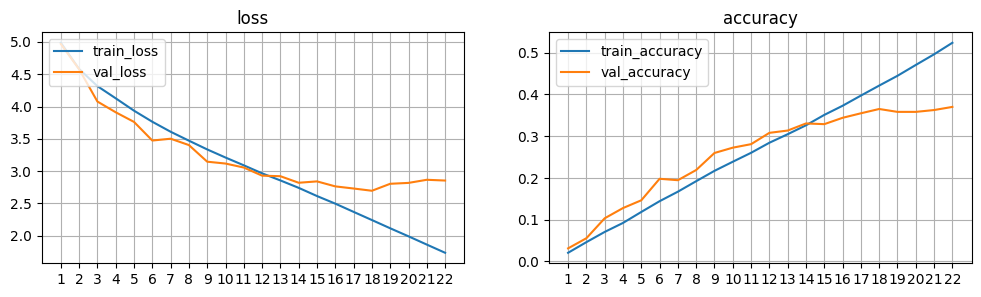

In [26]:
train(model3, 'vgg-03')

100%|██████████| 157/157 [00:03<00:00, 43.28it/s]


Epoch 1/1000: train_loss=3.8092, train_accuracy=0.1568, val_loss=4.5401, val_accuracy=0.0459
Saving params from epoch 1. Best loss: 4.5401


100%|██████████| 157/157 [00:03<00:00, 43.50it/s]


Epoch 2/1000: train_loss=4.3701, train_accuracy=0.0661, val_loss=4.4839, val_accuracy=0.0627
Saving params from epoch 2. Best loss: 4.4839


100%|██████████| 157/157 [00:04<00:00, 39.13it/s]


Epoch 3/1000: train_loss=4.2936, train_accuracy=0.0713, val_loss=4.2621, val_accuracy=0.0724
Saving params from epoch 3. Best loss: 4.2621


100%|██████████| 157/157 [00:02<00:00, 59.98it/s]


Epoch 4/1000: train_loss=4.2485, train_accuracy=0.0764, val_loss=4.4499, val_accuracy=0.0532


100%|██████████| 157/157 [00:03<00:00, 42.18it/s]


Epoch 5/1000: train_loss=4.2145, train_accuracy=0.0789, val_loss=4.3747, val_accuracy=0.0694


100%|██████████| 157/157 [00:03<00:00, 43.69it/s]


Epoch 6/1000: train_loss=4.1974, train_accuracy=0.0813, val_loss=4.9638, val_accuracy=0.0413


100%|██████████| 157/157 [00:03<00:00, 40.54it/s]


Epoch 7/1000: train_loss=4.1805, train_accuracy=0.0844, val_loss=4.3467, val_accuracy=0.0782
Loading model params from epoch 3
{'loss': 4.272931941986084, 'accuracy': 0.0679}


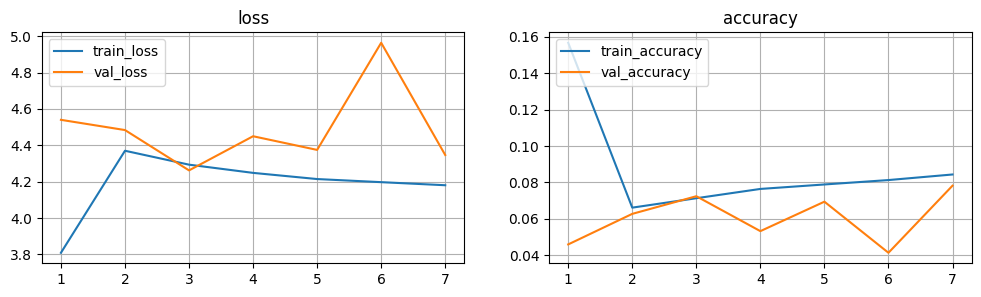

In [28]:
train(model2, 'vgg-04', weight_decay=0.01)

100%|██████████| 157/157 [00:03<00:00, 43.41it/s]


Epoch 1/1000: train_loss=4.9374, train_accuracy=0.0221, val_loss=4.7554, val_accuracy=0.0300
Saving params from epoch 1. Best loss: 4.7554


100%|██████████| 157/157 [00:03<00:00, 43.41it/s]


Epoch 2/1000: train_loss=4.5821, train_accuracy=0.0435, val_loss=4.3929, val_accuracy=0.0584
Saving params from epoch 2. Best loss: 4.3929


100%|██████████| 157/157 [00:03<00:00, 43.05it/s]


Epoch 3/1000: train_loss=4.3312, train_accuracy=0.0670, val_loss=4.1638, val_accuracy=0.0855
Saving params from epoch 3. Best loss: 4.1638


100%|██████████| 157/157 [00:03<00:00, 43.24it/s]


Epoch 4/1000: train_loss=4.1398, train_accuracy=0.0904, val_loss=4.0372, val_accuracy=0.1112
Saving params from epoch 4. Best loss: 4.0372


100%|██████████| 157/157 [00:03<00:00, 42.86it/s]


Epoch 5/1000: train_loss=3.9782, train_accuracy=0.1097, val_loss=3.8771, val_accuracy=0.1274
Saving params from epoch 5. Best loss: 3.8771


100%|██████████| 157/157 [00:03<00:00, 43.54it/s]


Epoch 6/1000: train_loss=3.8696, train_accuracy=0.1260, val_loss=3.7543, val_accuracy=0.1465
Saving params from epoch 6. Best loss: 3.7543


100%|██████████| 157/157 [00:03<00:00, 43.83it/s]


Epoch 7/1000: train_loss=3.7809, train_accuracy=0.1405, val_loss=3.7191, val_accuracy=0.1532
Saving params from epoch 7. Best loss: 3.7191


100%|██████████| 157/157 [00:03<00:00, 42.73it/s]


Epoch 8/1000: train_loss=3.7095, train_accuracy=0.1543, val_loss=3.6080, val_accuracy=0.1694
Saving params from epoch 8. Best loss: 3.6080


100%|██████████| 157/157 [00:03<00:00, 42.06it/s]


Epoch 9/1000: train_loss=3.6444, train_accuracy=0.1655, val_loss=3.4900, val_accuracy=0.1960
Saving params from epoch 9. Best loss: 3.4900


100%|██████████| 157/157 [00:03<00:00, 42.50it/s]


Epoch 10/1000: train_loss=3.5921, train_accuracy=0.1742, val_loss=3.5091, val_accuracy=0.1889


100%|██████████| 157/157 [00:03<00:00, 42.11it/s]


Epoch 11/1000: train_loss=3.5466, train_accuracy=0.1805, val_loss=3.4121, val_accuracy=0.2059
Saving params from epoch 11. Best loss: 3.4121


100%|██████████| 157/157 [00:03<00:00, 42.62it/s]


Epoch 12/1000: train_loss=3.5062, train_accuracy=0.1893, val_loss=3.4182, val_accuracy=0.2063


100%|██████████| 157/157 [00:03<00:00, 42.83it/s]


Epoch 13/1000: train_loss=3.4719, train_accuracy=0.1952, val_loss=3.3982, val_accuracy=0.2103
Saving params from epoch 13. Best loss: 3.3982


100%|██████████| 157/157 [00:03<00:00, 42.11it/s]


Epoch 14/1000: train_loss=3.4432, train_accuracy=0.2016, val_loss=3.5214, val_accuracy=0.1890


100%|██████████| 157/157 [00:03<00:00, 42.16it/s]


Epoch 15/1000: train_loss=3.4105, train_accuracy=0.2049, val_loss=3.4115, val_accuracy=0.2016


100%|██████████| 157/157 [00:03<00:00, 42.35it/s]


Epoch 16/1000: train_loss=3.3878, train_accuracy=0.2107, val_loss=3.4246, val_accuracy=0.2044


100%|██████████| 157/157 [00:03<00:00, 41.93it/s]


Epoch 17/1000: train_loss=3.3654, train_accuracy=0.2137, val_loss=3.5126, val_accuracy=0.1977
Loading model params from epoch 13
{'loss': 3.41535366897583, 'accuracy': 0.212}


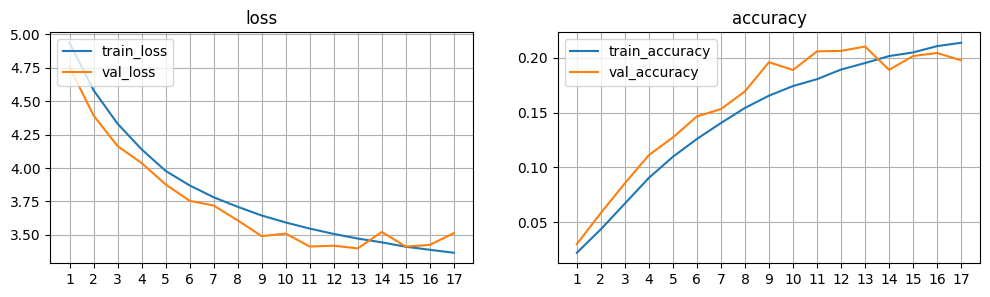

In [30]:
model5 = VGGNet2().to(utils.device)
train(model5, 'vgg-05', weight_decay=0.001)

100%|██████████| 157/157 [00:03<00:00, 43.24it/s]


Epoch 1/1000: train_loss=4.9266, train_accuracy=0.0229, val_loss=4.7941, val_accuracy=0.0306
Saving params from epoch 1. Best loss: 4.7941


100%|██████████| 157/157 [00:03<00:00, 43.84it/s]


Epoch 2/1000: train_loss=4.5178, train_accuracy=0.0494, val_loss=4.3310, val_accuracy=0.0704
Saving params from epoch 2. Best loss: 4.3310


100%|██████████| 157/157 [00:03<00:00, 43.51it/s]


Epoch 3/1000: train_loss=4.2556, train_accuracy=0.0755, val_loss=4.0469, val_accuracy=0.1003
Saving params from epoch 3. Best loss: 4.0469


100%|██████████| 157/157 [00:03<00:00, 43.37it/s]


Epoch 4/1000: train_loss=4.0451, train_accuracy=0.1024, val_loss=4.1052, val_accuracy=0.1033


100%|██████████| 157/157 [00:03<00:00, 43.08it/s]


Epoch 5/1000: train_loss=3.8763, train_accuracy=0.1282, val_loss=3.7100, val_accuracy=0.1441
Saving params from epoch 5. Best loss: 3.7100


100%|██████████| 157/157 [00:03<00:00, 43.27it/s]


Epoch 6/1000: train_loss=3.7370, train_accuracy=0.1489, val_loss=3.6127, val_accuracy=0.1704
Saving params from epoch 6. Best loss: 3.6127


100%|██████████| 157/157 [00:03<00:00, 43.64it/s]


Epoch 7/1000: train_loss=3.6244, train_accuracy=0.1675, val_loss=3.6574, val_accuracy=0.1725


100%|██████████| 157/157 [00:03<00:00, 43.84it/s]


Epoch 8/1000: train_loss=3.5306, train_accuracy=0.1837, val_loss=3.5435, val_accuracy=0.1874
Saving params from epoch 8. Best loss: 3.5435


100%|██████████| 157/157 [00:03<00:00, 43.44it/s]


Epoch 9/1000: train_loss=3.4457, train_accuracy=0.2000, val_loss=3.4589, val_accuracy=0.2081
Saving params from epoch 9. Best loss: 3.4589


100%|██████████| 157/157 [00:03<00:00, 43.31it/s]


Epoch 10/1000: train_loss=3.3774, train_accuracy=0.2115, val_loss=3.2909, val_accuracy=0.2268
Saving params from epoch 10. Best loss: 3.2909


100%|██████████| 157/157 [00:03<00:00, 43.08it/s]


Epoch 11/1000: train_loss=3.3182, train_accuracy=0.2216, val_loss=3.1597, val_accuracy=0.2498
Saving params from epoch 11. Best loss: 3.1597


100%|██████████| 157/157 [00:03<00:00, 43.86it/s]


Epoch 12/1000: train_loss=3.2651, train_accuracy=0.2316, val_loss=3.3616, val_accuracy=0.2214


100%|██████████| 157/157 [00:03<00:00, 39.93it/s]


Epoch 13/1000: train_loss=3.2172, train_accuracy=0.2416, val_loss=3.1342, val_accuracy=0.2594
Saving params from epoch 13. Best loss: 3.1342


100%|██████████| 157/157 [00:03<00:00, 41.95it/s]


Epoch 14/1000: train_loss=3.1715, train_accuracy=0.2494, val_loss=3.1904, val_accuracy=0.2522


100%|██████████| 157/157 [00:03<00:00, 41.29it/s]


Epoch 15/1000: train_loss=3.1331, train_accuracy=0.2582, val_loss=3.2494, val_accuracy=0.2434


100%|██████████| 157/157 [00:03<00:00, 41.17it/s]


Epoch 16/1000: train_loss=3.0978, train_accuracy=0.2630, val_loss=3.1647, val_accuracy=0.2589


100%|██████████| 157/157 [00:03<00:00, 41.74it/s]


Epoch 17/1000: train_loss=3.0646, train_accuracy=0.2703, val_loss=3.0414, val_accuracy=0.2791
Saving params from epoch 17. Best loss: 3.0414


100%|██████████| 157/157 [00:03<00:00, 41.57it/s]


Epoch 18/1000: train_loss=3.0289, train_accuracy=0.2771, val_loss=3.0960, val_accuracy=0.2699


100%|██████████| 157/157 [00:03<00:00, 41.69it/s]


Epoch 19/1000: train_loss=3.0039, train_accuracy=0.2804, val_loss=3.0084, val_accuracy=0.2876
Saving params from epoch 19. Best loss: 3.0084


100%|██████████| 157/157 [00:03<00:00, 41.74it/s]


Epoch 20/1000: train_loss=2.9768, train_accuracy=0.2859, val_loss=3.0583, val_accuracy=0.2806


100%|██████████| 157/157 [00:03<00:00, 41.49it/s]


Epoch 21/1000: train_loss=2.9557, train_accuracy=0.2901, val_loss=2.9576, val_accuracy=0.2899
Saving params from epoch 21. Best loss: 2.9576


100%|██████████| 157/157 [00:03<00:00, 43.17it/s]


Epoch 22/1000: train_loss=2.9284, train_accuracy=0.2965, val_loss=3.1159, val_accuracy=0.2716


100%|██████████| 157/157 [00:03<00:00, 43.39it/s]


Epoch 23/1000: train_loss=2.9039, train_accuracy=0.3010, val_loss=3.0127, val_accuracy=0.2890


100%|██████████| 157/157 [00:03<00:00, 43.45it/s]


Epoch 24/1000: train_loss=2.8865, train_accuracy=0.3041, val_loss=2.9996, val_accuracy=0.2928


100%|██████████| 157/157 [00:03<00:00, 43.39it/s]


Epoch 25/1000: train_loss=2.8660, train_accuracy=0.3084, val_loss=2.9482, val_accuracy=0.2987
Saving params from epoch 25. Best loss: 2.9482


100%|██████████| 157/157 [00:03<00:00, 42.90it/s]


Epoch 26/1000: train_loss=2.8487, train_accuracy=0.3135, val_loss=2.9307, val_accuracy=0.3100
Saving params from epoch 26. Best loss: 2.9307


100%|██████████| 157/157 [00:03<00:00, 43.28it/s]


Epoch 27/1000: train_loss=2.8317, train_accuracy=0.3164, val_loss=2.9528, val_accuracy=0.3031


100%|██████████| 157/157 [00:03<00:00, 41.17it/s]


Epoch 28/1000: train_loss=2.8165, train_accuracy=0.3173, val_loss=2.8872, val_accuracy=0.3126
Saving params from epoch 28. Best loss: 2.8872


100%|██████████| 157/157 [00:03<00:00, 40.82it/s]


Epoch 29/1000: train_loss=2.7958, train_accuracy=0.3205, val_loss=2.9532, val_accuracy=0.3014


100%|██████████| 157/157 [00:03<00:00, 42.25it/s]


Epoch 30/1000: train_loss=2.7823, train_accuracy=0.3245, val_loss=2.9155, val_accuracy=0.3083


100%|██████████| 157/157 [00:03<00:00, 42.96it/s]


Epoch 31/1000: train_loss=2.7666, train_accuracy=0.3275, val_loss=2.8210, val_accuracy=0.3228
Saving params from epoch 31. Best loss: 2.8210


100%|██████████| 157/157 [00:03<00:00, 42.24it/s]


Epoch 32/1000: train_loss=2.7527, train_accuracy=0.3286, val_loss=2.9030, val_accuracy=0.3134


100%|██████████| 157/157 [00:03<00:00, 43.01it/s]


Epoch 33/1000: train_loss=2.7441, train_accuracy=0.3323, val_loss=3.0128, val_accuracy=0.2910


100%|██████████| 157/157 [00:03<00:00, 43.22it/s]


Epoch 34/1000: train_loss=2.7277, train_accuracy=0.3353, val_loss=2.8925, val_accuracy=0.3112


100%|██████████| 157/157 [00:03<00:00, 43.35it/s]


Epoch 35/1000: train_loss=2.7124, train_accuracy=0.3379, val_loss=2.8882, val_accuracy=0.3134
Loading model params from epoch 31
{'loss': 2.838965922737122, 'accuracy': 0.3197}


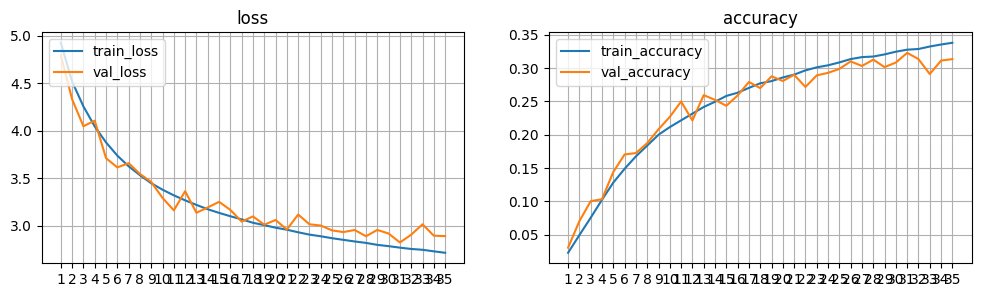

In [31]:
model6 = VGGNet2().to(utils.device)
train(model6, 'vgg-06', weight_decay=5e-4)

In [40]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders(train_split=0.5)
len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset)

(50000, 10000, 10000)

100%|██████████| 157/157 [00:03<00:00, 42.72it/s]


Epoch 1/1000: train_loss=4.9982, train_accuracy=0.0211, val_loss=4.8776, val_accuracy=0.0283
Saving params from epoch 1. Best loss: 4.8776


100%|██████████| 157/157 [00:03<00:00, 43.03it/s]


Epoch 2/1000: train_loss=4.6497, train_accuracy=0.0424, val_loss=4.4146, val_accuracy=0.0618
Saving params from epoch 2. Best loss: 4.4146


100%|██████████| 157/157 [00:03<00:00, 43.05it/s]


Epoch 3/1000: train_loss=4.3998, train_accuracy=0.0641, val_loss=4.2576, val_accuracy=0.0816
Saving params from epoch 3. Best loss: 4.2576


100%|██████████| 157/157 [00:03<00:00, 43.04it/s]


Epoch 4/1000: train_loss=4.2206, train_accuracy=0.0819, val_loss=4.0576, val_accuracy=0.1076
Saving params from epoch 4. Best loss: 4.0576


100%|██████████| 157/157 [00:03<00:00, 43.48it/s]


Epoch 5/1000: train_loss=4.0686, train_accuracy=0.1026, val_loss=3.9185, val_accuracy=0.1224
Saving params from epoch 5. Best loss: 3.9185


100%|██████████| 157/157 [00:03<00:00, 43.09it/s]


Epoch 6/1000: train_loss=3.9340, train_accuracy=0.1196, val_loss=3.8144, val_accuracy=0.1428
Saving params from epoch 6. Best loss: 3.8144


100%|██████████| 157/157 [00:03<00:00, 42.89it/s]


Epoch 7/1000: train_loss=3.8008, train_accuracy=0.1404, val_loss=3.7705, val_accuracy=0.1525
Saving params from epoch 7. Best loss: 3.7705


100%|██████████| 157/157 [00:03<00:00, 42.98it/s]


Epoch 8/1000: train_loss=3.6732, train_accuracy=0.1583, val_loss=3.5157, val_accuracy=0.1958
Saving params from epoch 8. Best loss: 3.5157


100%|██████████| 157/157 [00:03<00:00, 43.21it/s]


Epoch 9/1000: train_loss=3.5540, train_accuracy=0.1774, val_loss=3.4700, val_accuracy=0.1984
Saving params from epoch 9. Best loss: 3.4700


100%|██████████| 157/157 [00:03<00:00, 42.73it/s]


Epoch 10/1000: train_loss=3.4433, train_accuracy=0.1972, val_loss=3.3560, val_accuracy=0.2327
Saving params from epoch 10. Best loss: 3.3560


100%|██████████| 157/157 [00:03<00:00, 42.91it/s]


Epoch 11/1000: train_loss=3.3300, train_accuracy=0.2163, val_loss=3.5314, val_accuracy=0.1980


100%|██████████| 157/157 [00:03<00:00, 42.37it/s]


Epoch 12/1000: train_loss=3.2203, train_accuracy=0.2373, val_loss=3.2940, val_accuracy=0.2388
Saving params from epoch 12. Best loss: 3.2940


100%|██████████| 157/157 [00:03<00:00, 43.04it/s]


Epoch 13/1000: train_loss=3.1058, train_accuracy=0.2553, val_loss=3.2044, val_accuracy=0.2467
Saving params from epoch 13. Best loss: 3.2044


100%|██████████| 157/157 [00:03<00:00, 43.57it/s]


Epoch 14/1000: train_loss=2.9895, train_accuracy=0.2756, val_loss=3.1877, val_accuracy=0.2619
Saving params from epoch 14. Best loss: 3.1877


100%|██████████| 157/157 [00:03<00:00, 43.00it/s]


Epoch 15/1000: train_loss=2.8785, train_accuracy=0.2976, val_loss=3.0530, val_accuracy=0.2907
Saving params from epoch 15. Best loss: 3.0530


100%|██████████| 157/157 [00:03<00:00, 43.37it/s]


Epoch 16/1000: train_loss=2.7583, train_accuracy=0.3182, val_loss=2.9836, val_accuracy=0.2946
Saving params from epoch 16. Best loss: 2.9836


100%|██████████| 157/157 [00:03<00:00, 43.19it/s]


Epoch 17/1000: train_loss=2.6388, train_accuracy=0.3428, val_loss=2.9981, val_accuracy=0.3000


100%|██████████| 157/157 [00:03<00:00, 42.59it/s]


Epoch 18/1000: train_loss=2.5090, train_accuracy=0.3680, val_loss=3.0296, val_accuracy=0.2994


100%|██████████| 157/157 [00:03<00:00, 41.68it/s]


Epoch 19/1000: train_loss=2.3859, train_accuracy=0.3901, val_loss=3.1580, val_accuracy=0.2842


100%|██████████| 157/157 [00:03<00:00, 42.90it/s]


Epoch 20/1000: train_loss=2.2587, train_accuracy=0.4128, val_loss=2.9665, val_accuracy=0.3153
Saving params from epoch 20. Best loss: 2.9665


100%|██████████| 157/157 [00:03<00:00, 42.73it/s]


Epoch 21/1000: train_loss=2.1221, train_accuracy=0.4441, val_loss=3.1714, val_accuracy=0.2928


100%|██████████| 157/157 [00:02<00:00, 59.03it/s]


Epoch 22/1000: train_loss=1.9771, train_accuracy=0.4718, val_loss=3.2945, val_accuracy=0.2900


100%|██████████| 157/157 [00:02<00:00, 60.14it/s]


Epoch 23/1000: train_loss=1.8367, train_accuracy=0.5025, val_loss=3.0961, val_accuracy=0.3258


100%|██████████| 157/157 [00:02<00:00, 59.86it/s]

Epoch 24/1000: train_loss=1.6890, train_accuracy=0.5338, val_loss=3.2165, val_accuracy=0.3256
Loading model params from epoch 20


{'loss': 2.9856330501556396, 'accuracy': 0.3126}


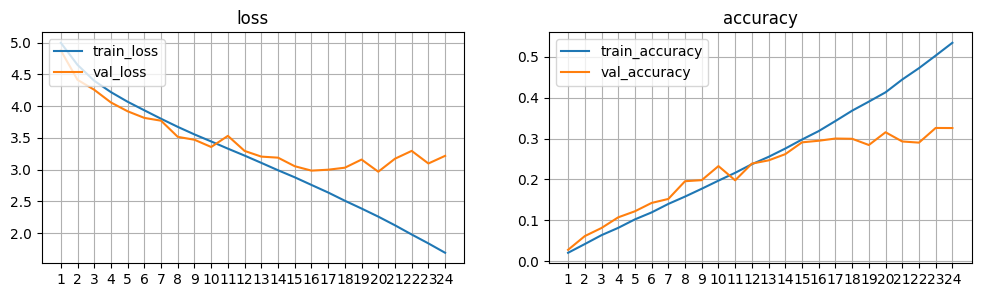

In [42]:
model7 = VGGNet2().to(utils.device)
train(model7, 'vgg-07')

In [43]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders(train_split=0.5, batch_size=256)
len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset)

(50000, 10000, 10000)

100%|██████████| 40/40 [00:03<00:00, 12.48it/s]


Epoch 1/1000: train_loss=4.8986, train_accuracy=0.0280, val_loss=4.6251, val_accuracy=0.0449
Saving params from epoch 1. Best loss: 4.6251


100%|██████████| 40/40 [00:03<00:00, 12.60it/s]


Epoch 2/1000: train_loss=4.4642, train_accuracy=0.0588, val_loss=4.5097, val_accuracy=0.0588
Saving params from epoch 2. Best loss: 4.5097


100%|██████████| 40/40 [00:03<00:00, 12.48it/s]


Epoch 3/1000: train_loss=4.2297, train_accuracy=0.0805, val_loss=4.2360, val_accuracy=0.0852
Saving params from epoch 3. Best loss: 4.2360


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]


Epoch 4/1000: train_loss=4.0531, train_accuracy=0.1031, val_loss=3.9825, val_accuracy=0.1158
Saving params from epoch 4. Best loss: 3.9825


100%|██████████| 40/40 [00:03<00:00, 12.48it/s]


Epoch 5/1000: train_loss=3.8916, train_accuracy=0.1243, val_loss=3.8119, val_accuracy=0.1409
Saving params from epoch 5. Best loss: 3.8119


100%|██████████| 40/40 [00:03<00:00, 12.42it/s]


Epoch 6/1000: train_loss=3.7623, train_accuracy=0.1461, val_loss=3.8064, val_accuracy=0.1459
Saving params from epoch 6. Best loss: 3.8064


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]


Epoch 7/1000: train_loss=3.6332, train_accuracy=0.1622, val_loss=3.6752, val_accuracy=0.1648
Saving params from epoch 7. Best loss: 3.6752


100%|██████████| 40/40 [00:03<00:00, 12.45it/s]


Epoch 8/1000: train_loss=3.5164, train_accuracy=0.1815, val_loss=3.5543, val_accuracy=0.1863
Saving params from epoch 8. Best loss: 3.5543


100%|██████████| 40/40 [00:03<00:00, 12.43it/s]


Epoch 9/1000: train_loss=3.4030, train_accuracy=0.2015, val_loss=3.6675, val_accuracy=0.1738


100%|██████████| 40/40 [00:03<00:00, 12.46it/s]


Epoch 10/1000: train_loss=3.3037, train_accuracy=0.2200, val_loss=3.4056, val_accuracy=0.2164
Saving params from epoch 10. Best loss: 3.4056


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]


Epoch 11/1000: train_loss=3.2024, train_accuracy=0.2358, val_loss=3.8746, val_accuracy=0.1650


100%|██████████| 40/40 [00:03<00:00, 12.39it/s]


Epoch 12/1000: train_loss=3.1036, train_accuracy=0.2531, val_loss=3.2613, val_accuracy=0.2445
Saving params from epoch 12. Best loss: 3.2613


100%|██████████| 40/40 [00:03<00:00, 12.38it/s]


Epoch 13/1000: train_loss=3.0064, train_accuracy=0.2681, val_loss=3.4420, val_accuracy=0.2238


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]


Epoch 14/1000: train_loss=2.9119, train_accuracy=0.2878, val_loss=3.5544, val_accuracy=0.2076


100%|██████████| 40/40 [00:03<00:00, 12.44it/s]


Epoch 15/1000: train_loss=2.8177, train_accuracy=0.3078, val_loss=3.4620, val_accuracy=0.2270


100%|██████████| 40/40 [00:03<00:00, 12.38it/s]


Epoch 16/1000: train_loss=2.7221, train_accuracy=0.3247, val_loss=3.1054, val_accuracy=0.2757
Saving params from epoch 16. Best loss: 3.1054


100%|██████████| 40/40 [00:03<00:00, 12.40it/s]


Epoch 17/1000: train_loss=2.6366, train_accuracy=0.3386, val_loss=3.1603, val_accuracy=0.2665


100%|██████████| 40/40 [00:03<00:00, 12.39it/s]


Epoch 18/1000: train_loss=2.5379, train_accuracy=0.3566, val_loss=3.3973, val_accuracy=0.2498


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 19/1000: train_loss=2.4340, train_accuracy=0.3773, val_loss=3.1227, val_accuracy=0.2786


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 20/1000: train_loss=2.3229, train_accuracy=0.4014, val_loss=3.0833, val_accuracy=0.2913
Saving params from epoch 20. Best loss: 3.0833


100%|██████████| 40/40 [00:03<00:00, 12.50it/s]


Epoch 21/1000: train_loss=2.2296, train_accuracy=0.4162, val_loss=3.2154, val_accuracy=0.2842


100%|██████████| 40/40 [00:03<00:00, 12.35it/s]


Epoch 22/1000: train_loss=2.1274, train_accuracy=0.4378, val_loss=3.1968, val_accuracy=0.2842


100%|██████████| 40/40 [00:03<00:00, 12.27it/s]


Epoch 23/1000: train_loss=2.0211, train_accuracy=0.4615, val_loss=3.4691, val_accuracy=0.2738


100%|██████████| 40/40 [00:03<00:00, 12.29it/s]


Epoch 24/1000: train_loss=1.8986, train_accuracy=0.4850, val_loss=3.3394, val_accuracy=0.2926
Loading model params from epoch 20
{'loss': 3.0786916778564453, 'accuracy': 0.29}


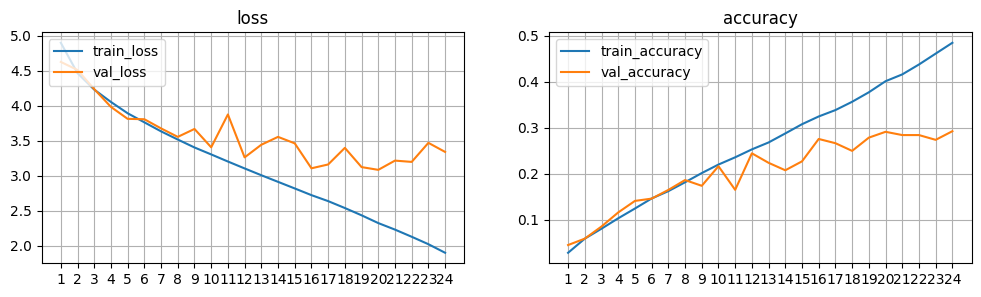

In [44]:
model8 = VGGNet2().to(utils.device)
train(model8, 'vgg-08')

In [46]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders(batch_size=256)
len(train_dl.dataset), len(valid_dl.dataset), len(test_dl.dataset)

(90000, 10000, 10000)

100%|██████████| 40/40 [00:03<00:00, 12.07it/s]


Epoch 1/1000: train_loss=4.7057, train_accuracy=0.0424, val_loss=4.4814, val_accuracy=0.0619
Saving params from epoch 1. Best loss: 4.4814


100%|██████████| 40/40 [00:03<00:00, 12.49it/s]


Epoch 2/1000: train_loss=4.1860, train_accuracy=0.0898, val_loss=3.9559, val_accuracy=0.1220
Saving params from epoch 2. Best loss: 3.9559


100%|██████████| 40/40 [00:03<00:00, 12.42it/s]


Epoch 3/1000: train_loss=3.9068, train_accuracy=0.1279, val_loss=3.9788, val_accuracy=0.1194


100%|██████████| 40/40 [00:03<00:00, 12.45it/s]


Epoch 4/1000: train_loss=3.6881, train_accuracy=0.1613, val_loss=3.5297, val_accuracy=0.1851
Saving params from epoch 4. Best loss: 3.5297


100%|██████████| 40/40 [00:03<00:00, 12.55it/s]


Epoch 5/1000: train_loss=3.5030, train_accuracy=0.1898, val_loss=3.3882, val_accuracy=0.2120
Saving params from epoch 5. Best loss: 3.3882


100%|██████████| 40/40 [00:03<00:00, 12.39it/s]


Epoch 6/1000: train_loss=3.3442, train_accuracy=0.2156, val_loss=3.3015, val_accuracy=0.2317
Saving params from epoch 6. Best loss: 3.3015


100%|██████████| 40/40 [00:03<00:00, 12.28it/s]


Epoch 7/1000: train_loss=3.1997, train_accuracy=0.2441, val_loss=3.0660, val_accuracy=0.2763
Saving params from epoch 7. Best loss: 3.0660


100%|██████████| 40/40 [00:03<00:00, 12.29it/s]


Epoch 8/1000: train_loss=3.0730, train_accuracy=0.2660, val_loss=3.0513, val_accuracy=0.2837
Saving params from epoch 8. Best loss: 3.0513


100%|██████████| 40/40 [00:03<00:00, 12.37it/s]


Epoch 9/1000: train_loss=2.9484, train_accuracy=0.2886, val_loss=2.9764, val_accuracy=0.2973
Saving params from epoch 9. Best loss: 2.9764


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 10/1000: train_loss=2.8187, train_accuracy=0.3142, val_loss=2.9049, val_accuracy=0.3063
Saving params from epoch 10. Best loss: 2.9049


100%|██████████| 40/40 [00:03<00:00, 12.43it/s]


Epoch 11/1000: train_loss=2.7117, train_accuracy=0.3342, val_loss=2.7969, val_accuracy=0.3303
Saving params from epoch 11. Best loss: 2.7969


100%|██████████| 40/40 [00:04<00:00,  9.18it/s]


Epoch 12/1000: train_loss=2.5849, train_accuracy=0.3589, val_loss=2.8196, val_accuracy=0.3300


100%|██████████| 40/40 [00:03<00:00, 10.59it/s]


Epoch 13/1000: train_loss=2.4726, train_accuracy=0.3803, val_loss=2.7497, val_accuracy=0.3416
Saving params from epoch 13. Best loss: 2.7497


100%|██████████| 40/40 [00:03<00:00, 12.34it/s]


Epoch 14/1000: train_loss=2.3561, train_accuracy=0.4032, val_loss=2.8055, val_accuracy=0.3348


100%|██████████| 40/40 [00:03<00:00, 12.23it/s]


Epoch 15/1000: train_loss=2.2310, train_accuracy=0.4292, val_loss=2.6929, val_accuracy=0.3612
Saving params from epoch 15. Best loss: 2.6929


100%|██████████| 40/40 [00:03<00:00, 12.45it/s]


Epoch 16/1000: train_loss=2.1092, train_accuracy=0.4528, val_loss=2.7365, val_accuracy=0.3565


100%|██████████| 40/40 [00:03<00:00, 12.13it/s]


Epoch 17/1000: train_loss=1.9863, train_accuracy=0.4808, val_loss=2.6661, val_accuracy=0.3660
Saving params from epoch 17. Best loss: 2.6661


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 18/1000: train_loss=1.8507, train_accuracy=0.5103, val_loss=2.6918, val_accuracy=0.3771


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 19/1000: train_loss=1.7255, train_accuracy=0.5338, val_loss=3.0874, val_accuracy=0.3411


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 20/1000: train_loss=1.5966, train_accuracy=0.5636, val_loss=2.8100, val_accuracy=0.3753


100%|██████████| 40/40 [00:03<00:00, 12.26it/s]


Epoch 21/1000: train_loss=1.4544, train_accuracy=0.5948, val_loss=2.7833, val_accuracy=0.3862
Loading model params from epoch 17
{'loss': 2.6879592054367065, 'accuracy': 0.3621}


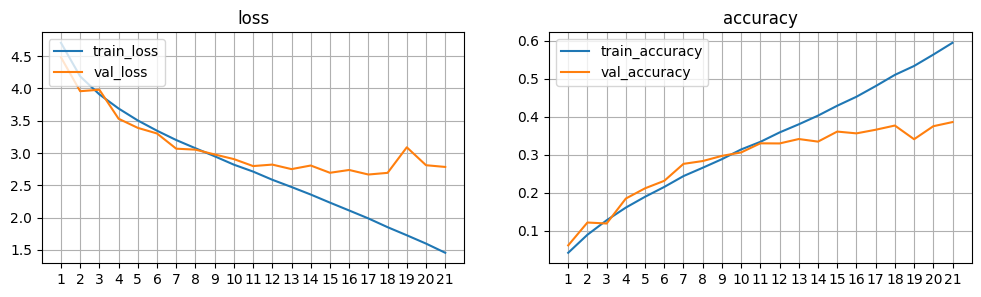

In [47]:
model9 = VGGNet2().to(utils.device)
train(model9, 'vgg-09')